# PRÀCTICA 3 - DISSOLUCIONS I DIPÒSITS

### 3 - Dissolucions d’un producte en un dipòsit

In [18]:
var('t')

t

In [19]:
tint=function('tint')(t)

In [20]:
V=100 # constant

In [21]:
ode3=diff(tint,t)==3*1-9*tint/V

In [22]:
sol3=desolve(ode3,dvar=tint,ivar=t,ics=[0,0])
sol3

100/3*(e^(9/100*t) - 1)*e^(-9/100*t)

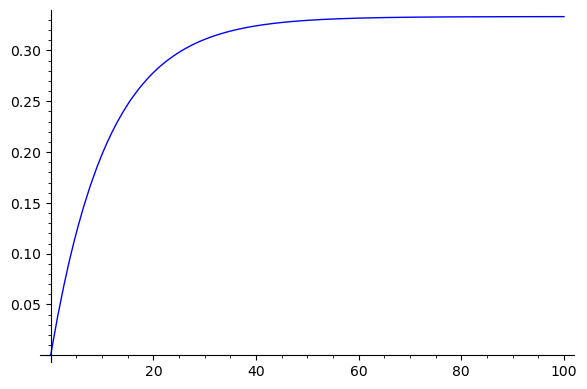

In [25]:
plot(sol3/V,0,100)

In [26]:
limit(sol3/V,t=oo)

1/3

In [29]:
v=function('v')(t)
v=desolve(diff(v,t)==9-10,dvar=v,ivar=t,ics=[0,100])
v

-t + 100

In [30]:
ode33=diff(tint,t)==3*1-10*tint/v

In [31]:
sol33=desolve(ode33,dvar=tint,ivar=t,ics=[0,0])
sol33

-1/3000000000000000000*t^10 + 1/3000000000000000*t^9 - 3/20000000000000*t^8 + 1/25000000000*t^7 - 7/1000000000*t^6 + 21/25000000*t^5 - 7/100000*t^4 + 1/250*t^3 - 3/20*t^2 + 3*t

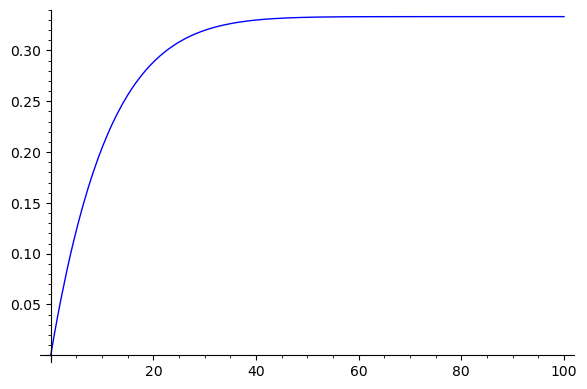

In [32]:
plot(sol33/v,0,100)

In [35]:
limit(sol33/v,t=100)

1/3

In [97]:
# el model és vàlid per t<=100

### 4 - Dissolucions d’un producte en dipòsits connectats en cadena

In [36]:
A=function('A')(t)
B=function('B')(t)

In [37]:
V

100

In [54]:
ode4a=diff(A,t)==3*1-9*A/V
ode4b=diff(B,t)==9*A/V-11*B/V

In [57]:
sol4=desolve_system([ode4a,ode4b],[A,B],ics=[0,0,0])
sol4

[A(t) == -100/3*e^(-9/100*t) + 100/3,
 B(t) == -150*e^(-9/100*t) + 1350/11*e^(-11/100*t) + 300/11]

In [62]:
A=sol4[0].rhs()/V
A(10).n()

0.197810113419800

In [63]:
B=sol4[1].rhs()/V
B(10).n()

0.0713963858367445

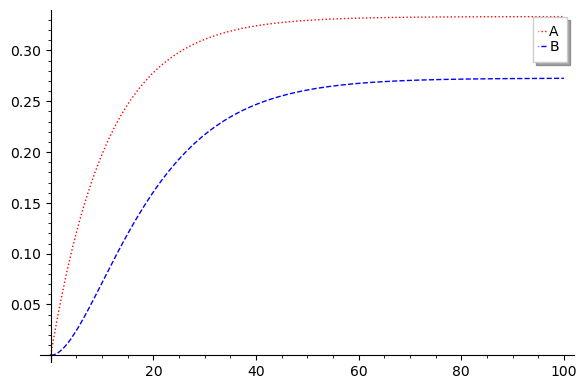

In [64]:
plot(A,t,0,100,color='red',linestyle=':',legend_label='A') + plot(B,t,0,100,color='blue',linestyle='--',legend_label='B')

In [66]:
lim(A,t=oo)

1/3

In [67]:
lim(B,t=oo)

3/11

In [68]:
va=function('va')(t)
va=desolve(diff(va,t)==9-10,dvar=va,ivar=t,ics=[0,100])
va

-t + 100

In [69]:
vb=function('vb')(t)
vb=desolve(diff(vb,t)==12-16,dvar=vb,ivar=t,ics=[0,100])
vb

-4*t + 100

In [72]:
reset('A B')

In [73]:
A=function('A')(t)
B=function('B')(t)

In [74]:
ode4a=diff(A,t)==3*1-10*A/va
ode4b=diff(B,t)==10*A/va-16*B/vb

In [78]:
sol4a=desolve(ode4a,dvar=A,ivar=t,ics=[0,0])
sol4a

-1/3000000000000000000*t^10 + 1/3000000000000000*t^9 - 3/20000000000000*t^8 + 1/25000000000*t^7 - 7/1000000000*t^6 + 21/25000000*t^5 - 7/100000*t^4 + 1/250*t^3 - 3/20*t^2 + 3*t

In [95]:
sol4b=desolve(ode4b.subs(A(t)==sol4a),dvar=B,ivar=t,ics=[0,0])
sol4b.simplify_full()

-637875/32768*I*pi + 1/1800000000000000000*t^10 - 53/90000000000000000*t^9 + 457/1600000000000000*t^8 - 2023/24000000000000*t^7 + 32879/1920000000000*t^6 + 1/1800000000000000000*(-89701171875000*I*pi + 89701171875000*I*arctan2(0, t - 25) - 179402343750000*log(5) + 89701171875000*log(abs(t - 25)) + 371122558593750)*t^4 - 34321/12800000000*t^5 + 1/1800000000000000000*(8970117187500000*I*pi - 8970117187500000*I*arctan2(0, t - 25) + 17940234375000000*log(5) - 8970117187500000*log(abs(t - 25)) - 11882373046875000)*t^3 + 1/1800000000000000000*(-336379394531250000*I*pi + 336379394531250000*I*arctan2(0, t - 25) - 672758789062500000*log(5) + 336379394531250000*log(abs(t - 25)) + 73778686523437500)*t^2 + 1/1800000000000000000*(5606323242187500000*I*pi - 5606323242187500000*I*arctan2(0, t - 25) + 11212646484375000000*log(5) - 5606323242187500000*log(abs(t - 25)) + 1401580810546875000)*t + 637875/32768*I*arctan2(0, t - 25) - 637875/16384*log(5) + 637875/32768*log(abs(t - 25))

In [96]:
# el model és vàlid per t<=25

### 5 - Dissolucions d’un producte en dipòsits interconnectats

In [98]:
reset('A B')

In [99]:
A=function('A')(t)
B=function('B')(t)

In [101]:
# volum A=volum B en tot temps
V

100

In [103]:
ode5a=diff(A,t)==3*1+4*B/V-13*A/V
ode5b=diff(B,t)==2*1+5*A/V-13*B/V

In [104]:
sol5=desolve_system([ode5a,ode5b],[A,B],ics=[0,0,0])
sol5

[A(t) == -20/149*(82*sqrt(5)*sinh(1/50*sqrt(5)*t) + 235*cosh(1/50*sqrt(5)*t))*e^(-13/100*t) + 4700/149,
 B(t) == -50/149*(47*sqrt(5)*sinh(1/50*sqrt(5)*t) + 82*cosh(1/50*sqrt(5)*t))*e^(-13/100*t) + 4100/149]

In [105]:
A=sol5[0].rhs()/V
A(10).n()

0.189722233137345

In [106]:
B=sol5[1].rhs()/V
B(10).n()

0.148120423690144

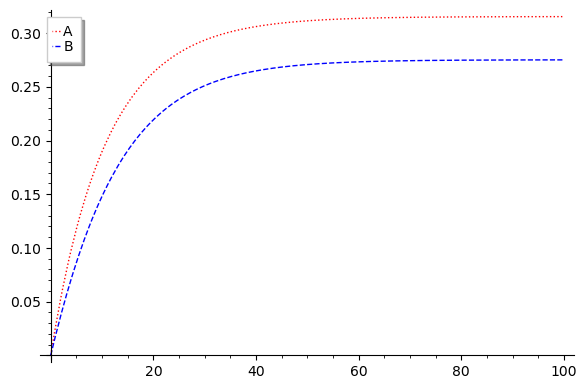

In [107]:
plot(A,t,0,100,color='red',linestyle=':',legend_label='A') + plot(B,t,0,100,color='blue',linestyle='--',legend_label='B')

In [108]:
lim(A,t=oo)

47/149

In [109]:
lim(B,t=oo)

41/149

##### Amb filtre

In [134]:
reset('A B')

In [135]:
A=function('A')(t)
B=function('B')(t)

In [136]:
ode51a=diff(A,t)==3*1+0.25*4*B/V-8*A/V-0.5*5*A/V
ode51b=diff(B,t)==2*1+0.5*5*A/V-9*B/V-0.25*4*B/V

In [137]:
sol51=desolve_system([ode51a,ode51b],[A,B],ics=[0,0,0])
sol51

[A(t) == -80/41*(sqrt(41)*sinh(1/400*sqrt(41)*t) + 16*cosh(1/400*sqrt(41)*t))*e^(-41/400*t) + 1280/41,
 B(t) == -20/41*(17*sqrt(41)*sinh(1/400*sqrt(41)*t) + 57*cosh(1/400*sqrt(41)*t))*e^(-41/400*t) + 1140/41]

In [138]:
A=sol51[0].rhs()/V
A(10).n()

0.191535746680835

In [139]:
B=sol51[1].rhs()/V
B(10).n()

0.146376799444928

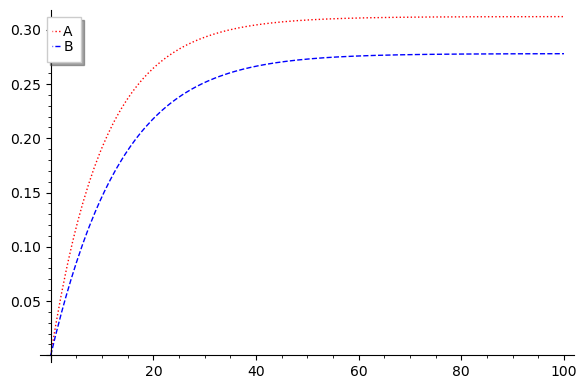

In [140]:
plot(A,t,0,100,color='red',linestyle=':',legend_label='A') + plot(B,t,0,100,color='blue',linestyle='--',legend_label='B')

In [141]:
lim(A,t=oo)

64/205

In [142]:
lim(B,t=oo)

57/205

### 6 - Dissolucions de diversos productes en dipòsits interconnectats

In [146]:
Iy=function('Iy')(t)
Ir=function('Ir')(t)
Ib=function('Ib')(t)
IIy=function('IIy')(t)
IIr=function('IIr')(t)
IIb=function('IIb')(t)
IIIy=function('IIIy')(t)
IIIr=function('IIIr')(t)
IIIb=function('IIIb')(t)

In [148]:
# Els volums son constants
VI=20
VII=40
VIII=60

In [149]:
ode61y=diff(Iy,t)==4*IIIy/VIII-4*Iy/VI
ode61r=diff(Ir,t)==4*IIIr/VIII-4*Ir/VI
ode61b=diff(Ib,t)==4*IIIb/VIII-4*Ib/VI
ode62y=diff(IIy,t)==4*Iy/VI-4*IIy/VII
ode62r=diff(IIr,t)==4*Ir/VI-4*IIr/VII
ode62b=diff(IIb,t)==4*Ib/VI-4*IIb/VII
ode63y=diff(IIIy,t)==4*IIy/VII-4*IIIy/VIII
ode63r=diff(IIIr,t)==4*IIr/VII-4*IIIr/VIII
ode63b=diff(IIIb,t)==4*IIb/VII-4*IIIb/VIII

In [150]:
system=[ode61y,ode61r,ode61b,ode62y,ode62r,ode62b,ode63y,ode63r,ode63b]
variables=[Iy,Ir,Ib,IIy,IIr,IIb,IIIy,IIIr,IIIb]
init_cond=[0,0,20,0,40,0,0,0,0,60]

In [156]:
sol6=desolve_system(system,variables,ics=init_cond)
sol6

[Iy(t) == -20/69*(11*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 20/3,
 Ir(t) == -10/69*(17*sqrt(23)*sin(1/60*sqrt(23)*t) - 115*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 10/3,
 Ib(t) == 10/23*(13*sqrt(23)*sin(1/60*sqrt(23)*t) - 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 10,
 IIy(t) == 80/69*(2*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 40/3,
 IIr(t) == 20/69*(25*sqrt(23)*sin(1/60*sqrt(23)*t) - 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 20/3,
 IIb(t) == -20/23*(11*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 20,
 IIIy(t) == 20/23*(sqrt(23)*sin(1/60*sqrt(23)*t) - 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 20,
 IIIr(t) == -10/23*(11*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 10,
 IIIb(t) == 30/23*(3*sqrt(23)*sin(1/60*sqrt(23)*t) + 23*cos(1/60*sqrt(23)*t))*e^(-11/60*t) + 30]

In [164]:
print('\tQuantitat de pintura en 5 minuts:\n\n\tDipòsit I\tDipòsit II\tDipòsit III')
print('Groc\t',sol6[0].rhs()(5).n(digits=7),'\t',sol6[3].rhs()(5).n(digits=7),'\t',sol6[6].rhs()(5).n(digits=7))
print('Vermell\t',sol6[1].rhs()(5).n(digits=7),'\t',sol6[4].rhs()(5).n(digits=7),'\t',sol6[7].rhs()(5).n(digits=7))
print('Blau\t',sol6[2].rhs()(5).n(digits=7),'\t',sol6[5].rhs()(5).n(digits=7),'\t',sol6[8].rhs()(5).n(digits=7))

	Quantitat de pintura en 5 minuts:

	Dipòsit I	Dipòsit II	Dipòsit III
Groc	 1.832071 	 24.88591 	 13.28202
Vermell	 7.634018 	 9.617875 	 2.748107
Blau	 10.53391 	 5.496213 	 43.96988


In [139]:
B=sol51[1].rhs()/V
B(10).n()

0.146376799444928

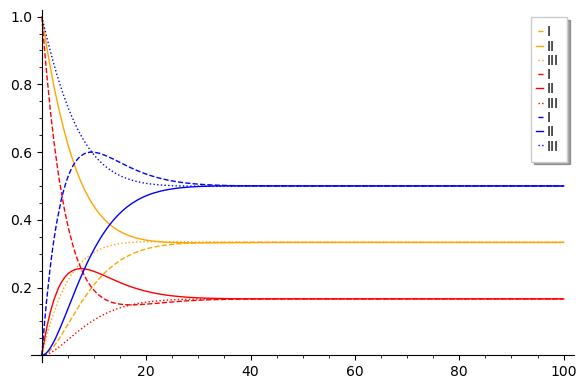

In [173]:
L=[]
colors=['orange','red','blue']
for i in range(0,3):
    p1=plot(sol6[i].rhs()/VI,t,0,100,color=colors[i],linestyle='--',legend_label='I')
    p2=plot(sol6[3+i].rhs()/VII,t,0,100,color=colors[i],linestyle='-',legend_label='II')
    p3=plot(sol6[6+i].rhs()/VIII,t,0,100,color=colors[i],linestyle=':',legend_label='III')
    L.append(p1)
    L.append(p2)
    L.append(p3)
sum(L)